## Import Library

In [1]:
## Basic Library
import pandas as pd
import numpy as np
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")

## Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print('Numpy version: ', np.__version__ )
print('Pandas version: ', pd.__version__)
print('Seaborn version: ', sns.__version__)

Numpy version:  1.23.5
Pandas version:  1.5.3
Seaborn version:  0.12.2


## Load dataset

In [3]:
df_prep = pd.read_csv('SBAnational.csv', low_memory=False)
df_prep.sample(5)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
713535,7424543003,AMERICAN PIE AND BAKERY INC,MUSKEGO,WI,53150,U.S. BANK NATIONAL ASSOCIATION,WI,0,8-Aug-94,1994,...,N,Y,NaN,31-Oct-94,"$37,918.00",$0.00,P I F,$0.00,"$37,918.00","$34,126.00"
569715,5616503008,UNION MARKET,HOLTVILLE,CA,92250,BBCN BANK,CA,0,31-Mar-93,1993,...,N,N,NaN,31-Jul-93,"$100,000.00",$0.00,P I F,$0.00,"$100,000.00","$80,000.00"
583381,5758703004,"GOERGES AND SON, INC.",SAN ANTONIO,TX,78229,TRUSTMARK NATIONAL BANK,TX,0,8-Jul-93,1993,...,N,N,NaN,31-Jul-93,"$125,000.00",$0.00,P I F,$0.00,"$125,000.00","$105,000.00"
218908,2547334003,DANVILLE MINI-MART,DANVILLE,CA,94526,BANK OF AMERICA CALIFORNIA N.A,CA,0,1-Dec-98,1999,...,0,N,NaN,31-Dec-98,"$10,000.00",$0.00,P I F,$0.00,"$10,000.00","$5,000.00"
291886,3021346009,"TRI-J, INC.",ARAPAHO,OK,73620,GREAT PLAINS NATIONAL BANK,OK,213112,11-Oct-07,2008,...,0,N,27-Apr-11,31-Mar-08,"$514,000.00",$0.00,CHGOFF,"$308,434.00","$514,000.00","$385,500.00"


In [4]:
df_prep.shape

(899164, 27)

In [5]:
print('Jumlah row: ', df_prep.shape[0])
print('Jumlah column: ', df_prep.shape[1])

Jumlah row:  899164
Jumlah column:  27


In [6]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

## Data Cleansing

**1. Cek Missing Values**

In [7]:
df_prep.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [8]:
df_prep.isnull().sum()*100 / len(df_prep)

LoanNr_ChkDgt         0.000000
Name                  0.001557
City                  0.003336
State                 0.001557
Zip                   0.000000
Bank                  0.173383
BankState             0.174162
NAICS                 0.000000
ApprovalDate          0.000000
ApprovalFY            0.000000
Term                  0.000000
NoEmp                 0.000000
NewExist              0.015125
CreateJob             0.000000
RetainedJob           0.000000
FranchiseCode         0.000000
UrbanRural            0.000000
RevLineCr             0.503579
LowDoc                0.287156
ChgOffDate           81.905526
DisbursementDate      0.263356
DisbursementGross     0.000000
BalanceGross          0.000000
MIS_Status            0.222095
ChgOffPrinGr          0.000000
GrAppv                0.000000
SBA_Appv              0.000000
dtype: float64

### Result

Jika dilihat **ChgOffDate** memiliki missing values sebesar **81%** sehingga lebih baik didrop saja

In [9]:
## Drop ChgOffDate
df_prep.drop(columns=['ChgOffDate'], inplace=True)

In [10]:
## Lakukan cleansing missing value pada kolom name, city, state, bank,
## bankState, NewExist, RevlineCr, LowDoc, DisbursementDate, MIS_Status

df_prep.dropna(subset=['Name', 'City', 'State', 'Bank', 'BankState', 'NewExist',
                       'RevLineCr', 'LowDoc', 'DisbursementDate', 'MIS_Status'
                      ], inplace=True)

## Lalu cek kembali null values nya
df_prep.isnull().sum()

LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
dtype: int64

**2. Cek Duplicated Data**

In [11]:
## Cek apakah ada data yg duplicated atau tidak
df_prep.duplicated().any()

False

### Result

Dataset tidak memiliki data yang duplicated

**3. Handle Error Value**

**3.1 ApprovalDate, DisbursementDate**

In [12]:
## Ubah kolom ApprovalDate, DisbursementDate menjadi datetime
df_prep[['ApprovalDate', 'DisbursementDate']] = df_prep[['ApprovalDate', 'DisbursementDate']].apply(pd.to_datetime)

In [13]:
## Cek kolom ApprovalDate, DisbursementDate
df_prep[['ApprovalDate', 'DisbursementDate']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886240 entries, 0 to 899163
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ApprovalDate      886240 non-null  datetime64[ns]
 1   DisbursementDate  886240 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 20.3 MB


**3.2 DisbursementGross, BalanceGross, ChgOfPrinGr, GrAppv, SBA_Appv**

In [14]:
## Cek kolom currency
## DisbursementGross, BalanceGross, ChgOffPrinGr, GrAppv, SBA_Appv

df_prep[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']].sample(2)

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
227231,"$58,731.00",$0.00,"$18,403.00","$20,000.00","$10,000.00"
674813,"$237,000.00",$0.00,$0.00,"$237,000.00","$177,750.00"


### Result

Terdapat tanda **'$'** dan **','** pada kolom2 currency. Sehingga dibutuhkan cleansing

In [15]:
## Lakukan cleansing tanda '$' dan ','
currency = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
df_prep[currency] = df_prep[currency].applymap(lambda x: x.replace('$', '').replace(',', ''))

## Lalu ubah tipe datanya menjadi float
df_prep[currency] = df_prep[currency].astype(float)

## Lalu cek kembali datanya
df_prep[currency].sample(2)

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
244561,150000.0,0.0,0.0,150000.0,112500.0
486171,215000.0,0.0,0.0,215000.0,182750.0


In [16]:
## Cek tipe datanya
df_prep[currency].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886240 entries, 0 to 899163
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DisbursementGross  886240 non-null  float64
 1   BalanceGross       886240 non-null  float64
 2   ChgOffPrinGr       886240 non-null  float64
 3   GrAppv             886240 non-null  float64
 4   SBA_Appv           886240 non-null  float64
dtypes: float64(5)
memory usage: 40.6 MB


**3.3 ApprovalFY**

In [17]:
## Cek kolom ApprovalFY
df_prep['ApprovalFY'].unique()

array(['1997', '1980', '2006', '1998', '1999', '2000', '2001', '1972',
       '2003', '2004', '1978', '1979', '1981', '2005', '1982', '1983',
       '1973', '1984', '2007', '1985', '1986', '1987', '2008', '1988',
       '2009', '1989', '1991', '1990', '1974', '2010', '2011', '1992',
       '1993', '2002', '2012', '2013', '1994', '2014', '1975', '1977',
       '1976', '1968', '1976A', '1969', '1995', '1970', '1996', '1971'],
      dtype=object)

### Result

Terdapat tahun **1976A** pada kolom **ApprovalFY** sehingga perlu dilakukan cleansing

In [18]:
## Lakukan cleansing pada kolom ApprovalFY

def clean(x):
    if isinstance(x, str):
        return x.replace('A', '')
    return x

## Input fungsi clean untuk melakukan cleansing pada kolom ApprovalFY
## dan lakukan perubahan tipe data menjadi int
df_prep['ApprovalFY'] = df_prep['ApprovalFY'].apply(clean).astype(int)

## Cek kembali kolomnya
df_prep['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1982, 1983, 1973, 1984, 2007, 1985, 1986, 1987,
       2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010, 2011, 1992, 1993,
       2002, 2012, 2013, 1994, 2014, 1975, 1977, 1976, 1968, 1969, 1995,
       1970, 1996, 1971])

**3.4 NewExist**

In [19]:
## Cek kolom NewExist
df_prep['NewExist'].unique()

array([2., 1., 0.])

In [20]:
## Lakukan cleansing pada value 0
## Lakukan perubahan tipe data terlebih dahulu
df_prep['NewExist'] = df_prep['NewExist'].astype(int)

## Filter hanya mengambil value 1 dan 2 saja
df_prep = df_prep[(df_prep['NewExist'] == 1) | (df_prep['NewExist'] == 2)]
df_prep['NewExist'].unique()

array([2, 1])

**3.5 FranchiseCode**

In [21]:
## Cek kolom FranchiseCode
df_prep['FranchiseCode'].unique()

array([    1,     0, 15100, ...,  2899, 18701, 15930])

In [22]:
## Ambil hanya value 1 dan 0 saja pada kolom franchisecode
df_prep = df_prep[(df_prep['FranchiseCode'] == 1) | (df_prep['FranchiseCode'] == 0)]
df_prep['FranchiseCode'].unique()

array([1, 0])

**3.6 LowDoc, RevLineCr**

In [23]:
## Cek kolom LowDoc dan RevLineCr
print('LowDoc: ',df_prep['LowDoc'].unique())
print('RevlineCr: ', df_prep['RevLineCr'].unique())

LowDoc:  ['Y' 'N' 'C' '1' 'S' 'R' 'A' '0']
RevlineCr:  ['N' '0' 'Y' 'T' '`' ',' '1' '3' '2' 'R' 'A' '5' '.' '4' '-' 'Q' 'C']


In [24]:
## Lakukan filter dengan mengambil Y dan N saja
df_prep = df_prep[(df_prep['LowDoc'] == 'Y') | (df_prep['LowDoc'] == 'N')]
df_prep = df_prep[(df_prep['RevLineCr'] == 'Y') | (df_prep['RevLineCr'] == 'N')]

## Kemudian cek kembali valuenya
print('LowDoc: ',df_prep['LowDoc'].unique())
print('RevlineCr: ', df_prep['RevLineCr'].unique())

LowDoc:  ['Y' 'N']
RevlineCr:  ['N' 'Y']


**3.7 NAICS**

In [25]:
## Cek kolom NAICS
df_prep['NAICS'].value_counts()

0         141825
722110     13099
621210      9097
811111      9064
722211      6525
           ...  
524192         1
212231         1
325192         1
331411         1
327410         1
Name: NAICS, Length: 1305, dtype: int64

In [26]:
## Filter kolom NAICS yg valuenya 0 tidak dimasukin sesuai dokumentasi industri
df_prep = df_prep[df_prep['NAICS'] != 0]

## Kemudian cek kembali
df_prep['NAICS'].value_counts()

722110    13099
621210     9097
811111     9064
722211     6525
561730     6147
          ...  
311351        1
514190        1
624221        1
212324        1
212325        1
Name: NAICS, Length: 1304, dtype: int64

In [27]:
## Ubah NAICS dari int ke str
df_prep['NAICS'] = df_prep['NAICS'].astype(str)

**3.8 Term**

In [28]:
df_prep[df_prep['Term']==0]['Term']

635       0
673       0
776       0
916       0
1084      0
         ..
884703    0
885472    0
885545    0
891494    0
891986    0
Name: Term, Length: 506, dtype: int64

In [29]:
## Lakukan cleansing Term harus lebih dari 0 bulan
df_prep = df_prep[df_prep['Term'] > 0]

### Feature Encoding

In [30]:
## Encode NewExist jika Existing Business(1)->(0), NewBusiness(2)->(1)
df_prep['NewExist'] = np.where(df_prep['NewExist'] == 1, 0, 1)

## Encode LowDoc jika Y->1, N->0 
df_prep['LowDoc'] = np.where(df_prep['LowDoc'] == 'N', 0, 1)

## Encode RevLineCr jika Y->1, N->0
df_prep['RevLineCr'] = np.where(df_prep['RevLineCr'] == 'N', 0, 1)

## Encode MIS_Status jika CHGOFF -> 1, jika PIF -> 0
df_prep['MIS_Status'] = np.where(df_prep['MIS_Status'] == 'CHGOFF', 1, 0)

In [31]:
print('NewExist: ', df_prep['NewExist'].unique())
print('LowDoc: ', df_prep['LowDoc'].unique())
print('FranchiseCode: ', df_prep['FranchiseCode'].unique())
print('RevLineCr: ', df_prep['RevLineCr'].unique())
print('MIS_Status: ', df_prep['MIS_Status'].unique())

NewExist:  [1 0]
LowDoc:  [1 0]
FranchiseCode:  [1 0]
RevLineCr:  [0 1]
MIS_Status:  [0 1]


### Feature Extraction

**1. Membuat kolom baru DaysToDisbursement = Lama hari pencairan pinjaman**

In [32]:
## DaysToDisbursement -> DisbursementDate - ApprovalDate
df_prep['DaysToDisbursement'] = df_prep['DisbursementDate'] - df_prep['ApprovalDate']

## Kemudian cek kolomnya
df_prep[['DaysToDisbursement']].sample(2)

,DaysToDisbursement
878788,34 days
541819,60 days


In [33]:
## Menghapus value days pada kolom DaysToDisbursement
df_prep['DaysToDisbursement'] = df_prep['DaysToDisbursement'].astype('str').apply(lambda x: x[:x.index('d')-1]).astype(int)

## Kemudian cek kolomnya
df_prep[['DaysToDisbursement']].sample(2)

,DaysToDisbursement
454200,64
191775,34


**2. Membuat kolom baru DisbursementYear = tahun dari tanggal pencairan**

In [34]:
## Mengambil value tahun saja pada kolom DisbursementDate
df_prep['DisbursementYear'] = df_prep['DisbursementDate'].dt.year

## Lalu filter hanya tahun 1987-2014 saja
df_prep = df_prep[(df_prep['DisbursementYear'] >=1987) & (df_prep['DisbursementYear'] <=2014)]

## Kemudian Cek hasilnya
df_prep['DisbursementYear'].unique()

array([1999, 1997, 1998, 2006, 2001, 2002, 2000, 2004, 2003, 2005, 2009,
       2007, 2008, 1996, 2010, 1995, 2012, 2011, 2013, 1987, 1988, 1989,
       1990, 2014, 1994, 1991, 1992, 1993])

**3. Membuat kolom baru StateSame = peminjam tinggal di kota yang sama dengan bank**

In [35]:
## StateSame -> State = BankState
## Jika sama -> 1, jika tidak -> 0
df_prep['StateSame'] = np.where(df_prep['State'] == df_prep['BankState'], 1, 0)

## Kemudian cek kolomnya
df_prep['StateSame'].unique()

array([0, 1])

**4. Membuat kolom baru SBA_AppvPct = Persentase pinjaman yang dijamin SBA**

In [36]:
## SBA_AppvPct -> SBA_Appv / GrAppv
df_prep['SBA_AppvPct'] = df_prep['SBA_Appv'] / df_prep['GrAppv']

## Kemudian cek kolomnya
df_prep[['SBA_Appv', 'GrAppv', 'SBA_AppvPct']].sample(2)

,SBA_Appv,GrAppv,SBA_AppvPct
147803,7500.0,15000.0,0.50
91713,29750.0,35000.0,0.85


**5. Membuat kolom baru AppvDisbursed = pinjaman dicairkan atau tidak**

In [37]:
## AppvDisbursed -> DisbursementGross = GrAppv
## Jika ya -> 1, jika tidak -> 0
df_prep['AppvDisbursed'] = np.where(df_prep['DisbursementGross'] == df_prep['GrAppv'], 1, 0)

## Kemudian cek kolomnya
df_prep[['DisbursementGross', 'GrAppv', 'AppvDisbursed']].sample(2)

,DisbursementGross,GrAppv,AppvDisbursed
310512,24772.0,10000.0,0
248462,55000.0,35000.0,0


**6. Membuat kolom baru industri = nama2 industri yang meminjam**

In [38]:
## Membuat kolom baru industri dengan mengambil 2 digit pertama pada kolom NAICS
df_prep['Industri'] = df_prep['NAICS'].apply(lambda x: x[:2])

## Melakukan mapping industri berdasarkan 2 digit pertama NAICS
df_prep['Industri'] = df_prep['Industri'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})

In [39]:
## Cek kolomnya
df_prep['Industri'].value_counts()

Retail_trade                77346
Construction                48903
Prof/Science/Tech           48843
Manufacturing               45058
Other_no_pub                42825
Wholesale_trade             34586
Healthcare/Social_assist    34066
Accom/Food_serv             28790
Admin_sup/Waste_Mgmt_Rem    21364
Trans/Ware                  15251
RE/Rental/Lease              9253
Arts/Entertain/Rec           8771
Ag/For/Fish/Hunt             7624
Information                  7311
Finance/Insurance            6272
Educational                  3829
Min/Quar/Oil_Gas_ext         1352
Utilities                     427
Public_Admin                  181
Mgmt_comp                     116
Name: Industri, dtype: int64

**7. Membuat kolom baru Recession = tahun terjadinya resesi di USA**

In [40]:
df_prep['Recession'] = np.where(((2007 <= df_prep['DisbursementYear']) & (df_prep['DisbursementYear']<=2008)),1,0)

In [41]:
df_prep[['DisbursementDate', 'DisbursementYear', 'Recession']].sample(10)

,DisbursementDate,DisbursementYear,Recession
658510,2003-10-31,2003,0
812855,2006-02-28,2006,0
558963,2002-10-31,2002,0
455267,1991-07-31,1991,0
703246,2004-04-30,2004,0
40360,2005-05-31,2005,0
315620,2009-03-31,2009,0
724593,1995-01-31,1995,0
302166,2008-05-31,2008,1
671912,2003-11-30,2003,0


In [42]:
df_model = df_prep.copy()

In [43]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442168 entries, 0 to 899161
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   LoanNr_ChkDgt       442168 non-null  int64         
 1   Name                442168 non-null  object        
 2   City                442168 non-null  object        
 3   State               442168 non-null  object        
 4   Zip                 442168 non-null  int64         
 5   Bank                442168 non-null  object        
 6   BankState           442168 non-null  object        
 7   NAICS               442168 non-null  object        
 8   ApprovalDate        442168 non-null  datetime64[ns]
 9   ApprovalFY          442168 non-null  int64         
 10  Term                442168 non-null  int64         
 11  NoEmp               442168 non-null  int64         
 12  NewExist            442168 non-null  int64         
 13  CreateJob           442168 no

### Feature Selection

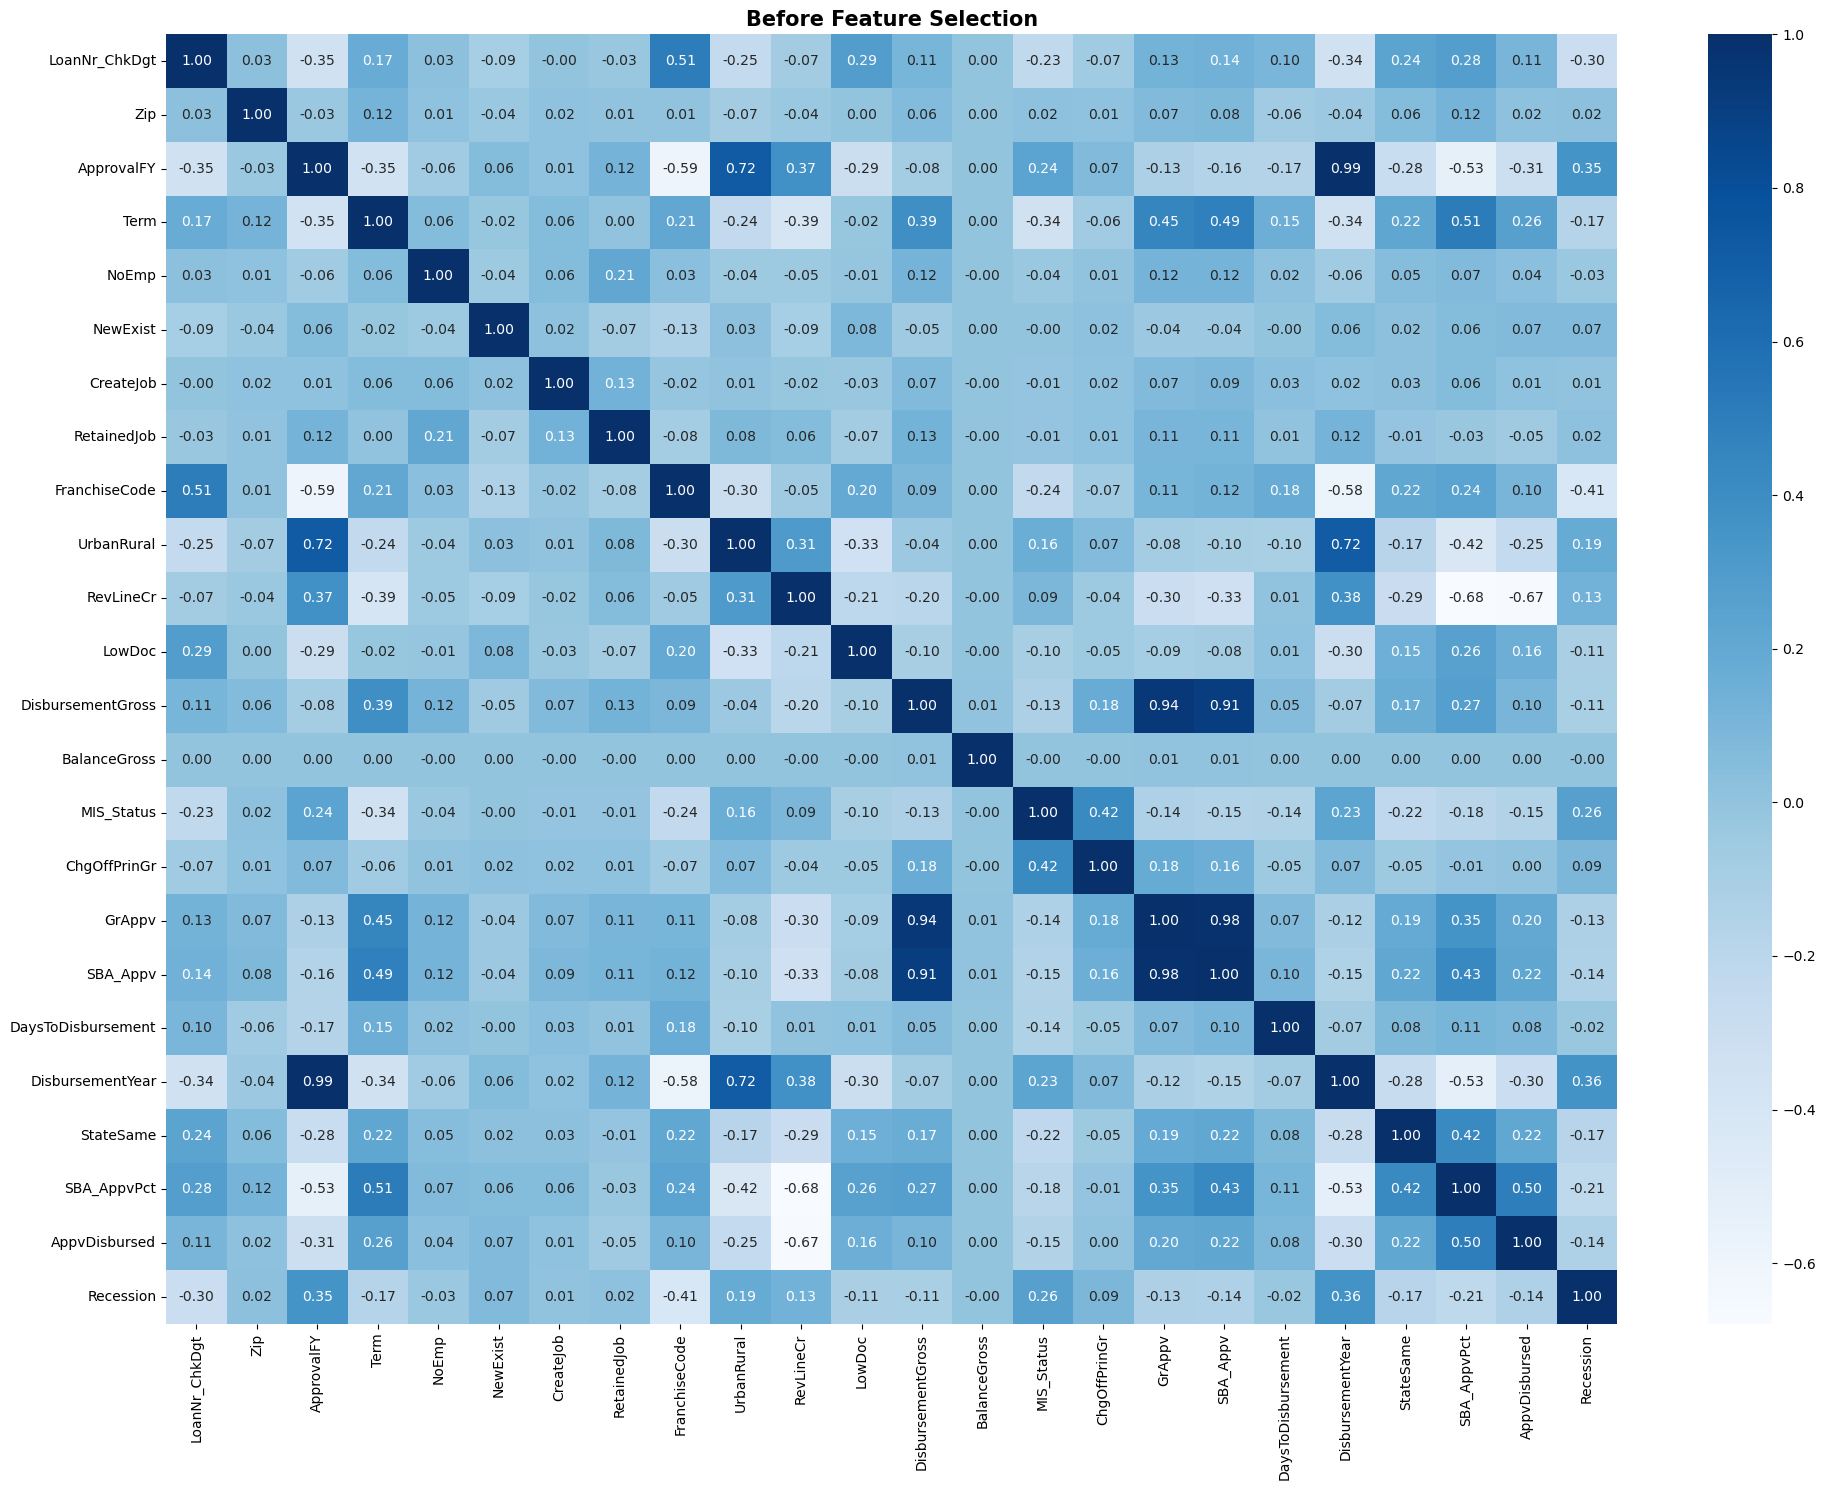

In [44]:
plt.figure(figsize=(20,15))
sns.heatmap(df_model.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.title('Before Feature Selection', fontsize=15, fontweight='bold')
plt.tight_layout()

#### Result

Alasan drop kolom:
1. 'LoanNr_ChkDgt' : Merupakan primary key
2. 'Name' : Memiliki kardinalitas yang cukup tinggi
3. 'City, Zip' : Memiliki kardinalitas yang cukup tinggi dan sudah terwakilkan dengan **State**
4. 'State, Bank, BankState' : Memiliki kardinalitas yang cukup tinggi dan sudah terwakilkan dengan **StateSame**
5. 'NAICS' : Memiliki kardinalitas cukup tinggi dan sudah digantikan dengan **Industri**
6. 'ApprovalDate, ApprovalFY' : Merupakan waktu pinjaman ketika disetujui sehingga tidak cocok untuk menjadi prediktor target
7. 'DisbursementDate' : Kolom tanggal pencairan tidak cocok untuk menjadi prediktor target
8. 'BalanceGross' : 80% memiliki angka 0, sehingga didrop saja
9. 'ChgOffPrinGr' : Kolom jumlah pinjaman yang dibebankan ketika chgoff sehingga tidak cocok untuk menjadi prediktor target
10. 'GrAppv, SBA_Appv' : Digantikan dengan SBA_AppvPct
11. 'Industri' : Memiliki kardinalitas yang cukup tinggi
12. 'DisbursementYear' : Tahun pencairan, tidak cocok menjadi prediktor target

In [45]:
df_model.drop(columns = ['LoanNr_ChkDgt', 'Name', 'City', 'Zip', 'State', 'Bank', 'BankState', 'NAICS',
                         'ApprovalDate', 'ApprovalFY', 'DisbursementDate', 'BalanceGross', 'ChgOffPrinGr',
                         'GrAppv', 'SBA_Appv', 'Industri', 'DisbursementYear'
                        ], inplace=True)

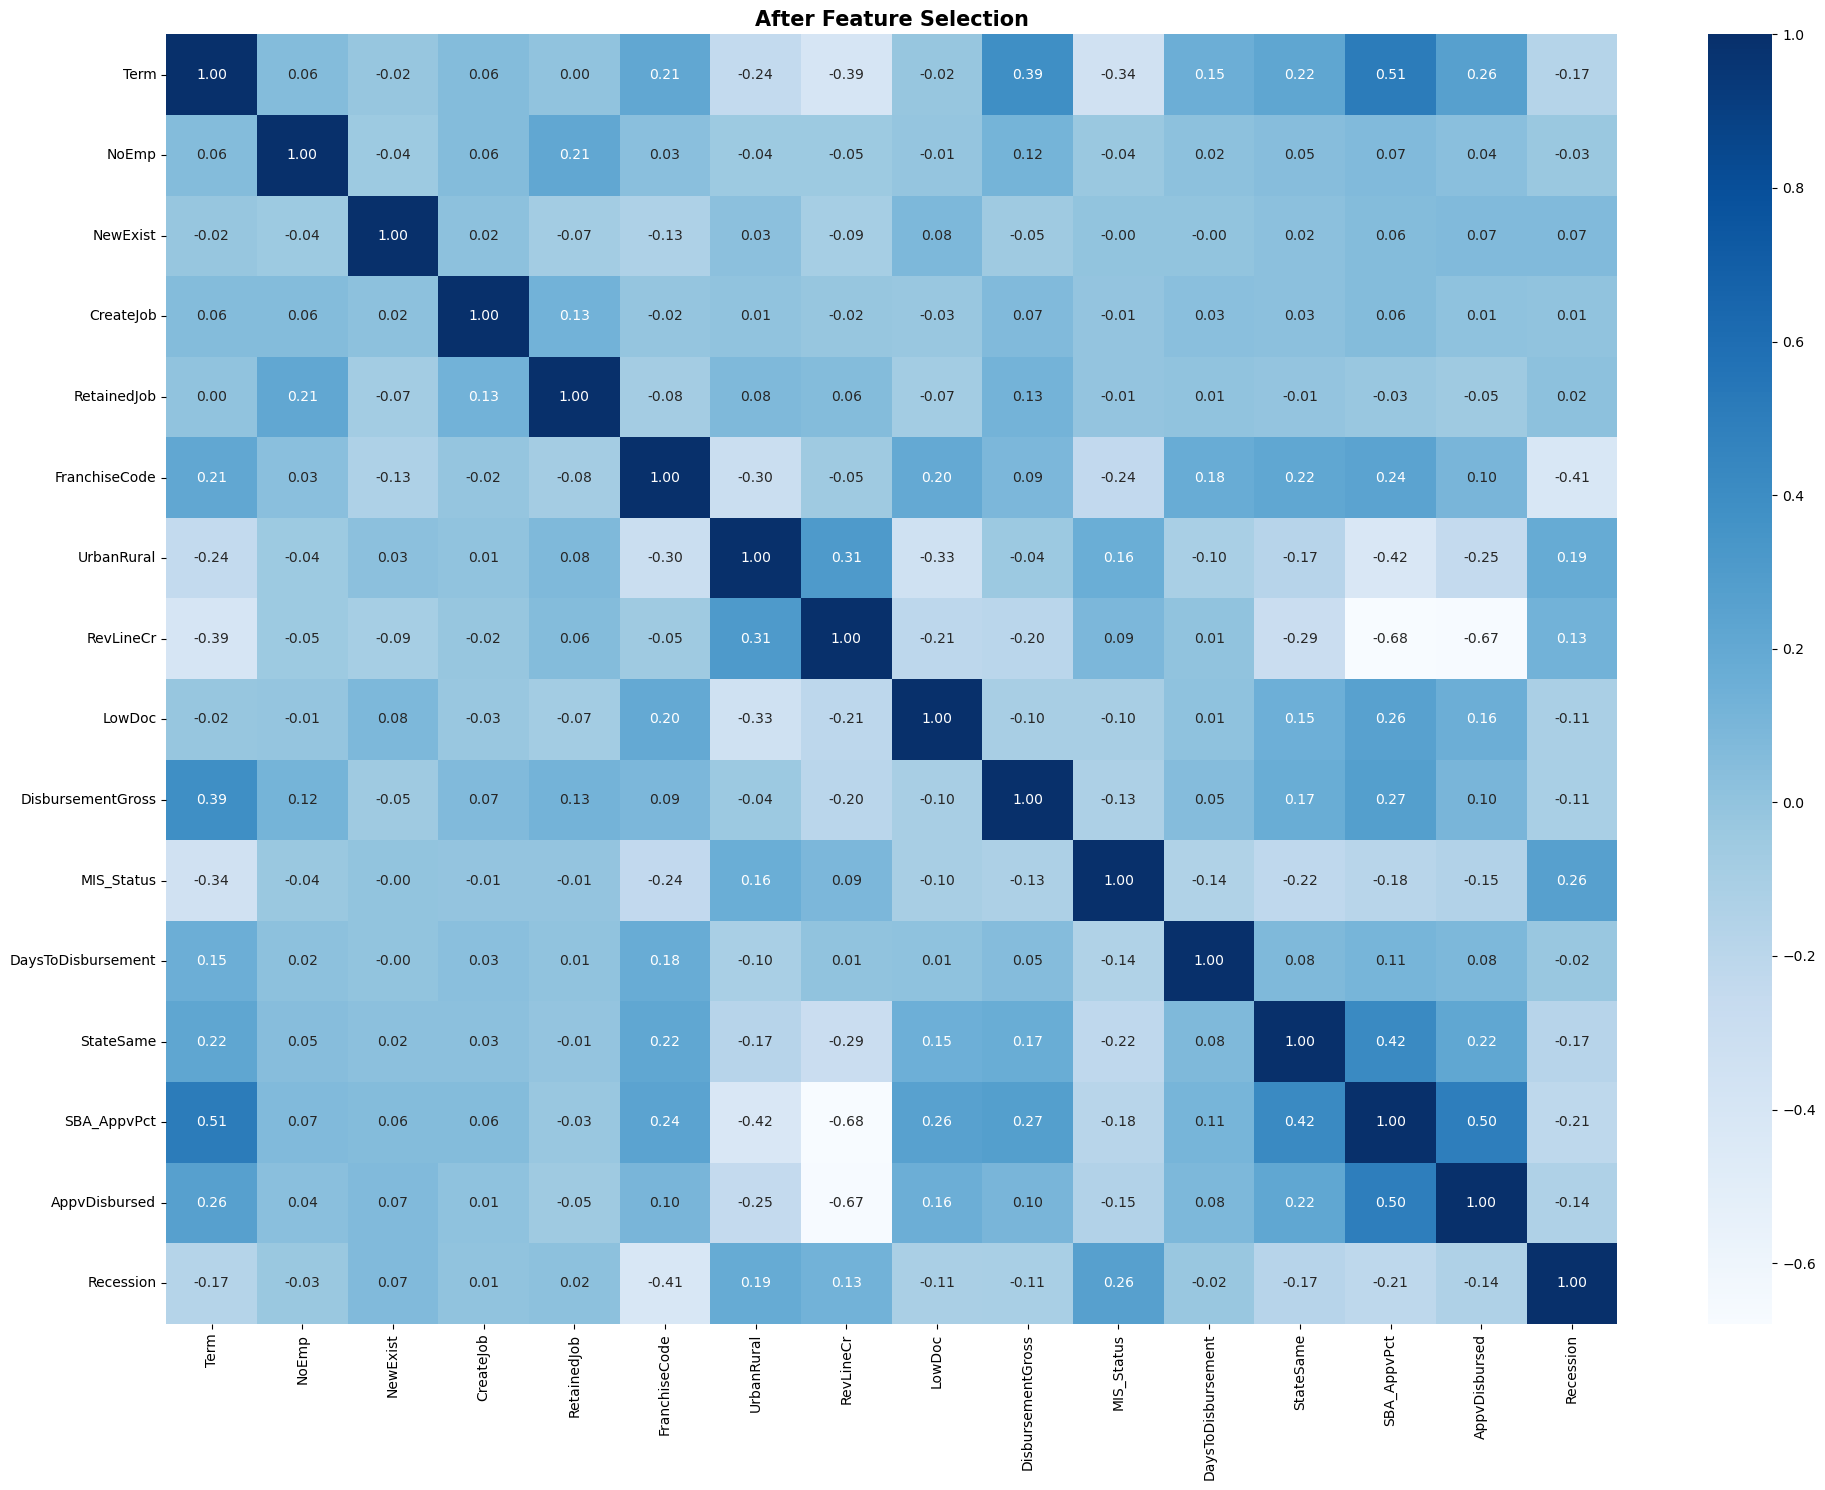

In [46]:
plt.figure(figsize=(20,15))
sns.heatmap(df_model.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.title('After Feature Selection', fontsize=15, fontweight='bold')
plt.tight_layout()

In [47]:
df_model.sample(4)

,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,MIS_Status,DaysToDisbursement,StateSame,SBA_AppvPct,AppvDisbursed,Recession
6312,84,2,1,0,0,1,1,1,0,13000.0,0,135,0,0.50,0,0
609587,84,12,0,2,12,1,1,1,0,35000.0,0,62,0,0.50,1,0
165759,21,6,0,0,6,0,1,0,0,100000.0,1,156,0,0.50,1,1
373892,120,4,0,0,0,1,1,0,0,140000.0,0,54,1,0.75,1,0


In [48]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442168 entries, 0 to 899161
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Term                442168 non-null  int64  
 1   NoEmp               442168 non-null  int64  
 2   NewExist            442168 non-null  int64  
 3   CreateJob           442168 non-null  int64  
 4   RetainedJob         442168 non-null  int64  
 5   FranchiseCode       442168 non-null  int64  
 6   UrbanRural          442168 non-null  int64  
 7   RevLineCr           442168 non-null  int64  
 8   LowDoc              442168 non-null  int64  
 9   DisbursementGross   442168 non-null  float64
 10  MIS_Status          442168 non-null  int64  
 11  DaysToDisbursement  442168 non-null  int64  
 12  StateSame           442168 non-null  int64  
 13  SBA_AppvPct         442168 non-null  float64
 14  AppvDisbursed       442168 non-null  int64  
 15  Recession           442168 non-nul

### Feature Transformation

In [49]:
features_transform = ['Term', 'DisbursementGross']

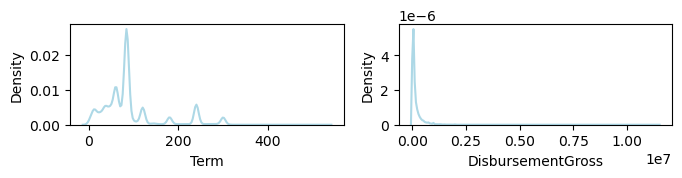

In [50]:
features = features_transform

plt.figure(figsize=(12,6))

for i in range(0, len(features)):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(df_model[features[i]], color='lightblue')
    plt.xlabel(features[i])

In [51]:
df_model['Term_transform'] = st.boxcox(df_model['Term'])[0]
df_model['DisbursementGross_transform'] = st.boxcox(df_model['DisbursementGross'])[0]

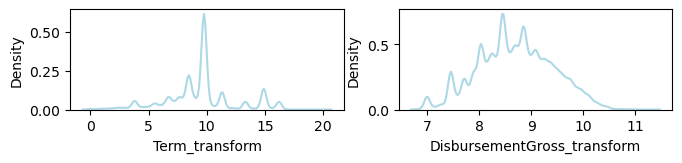

In [52]:
features = ['Term_transform', 'DisbursementGross_transform']

plt.figure(figsize=(12,6))

for i in range(0, len(features)):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(df_model[features[i]], color='lightblue')
    plt.xlabel(features[i])

In [53]:
## Drop Term, dan DisbursementGross karna sudah diganti dengan feature transform
df_model.drop(columns=['Term', 'DisbursementGross'], inplace=True)

### Standardization

In [54]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442168 entries, 0 to 899161
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NoEmp                        442168 non-null  int64  
 1   NewExist                     442168 non-null  int64  
 2   CreateJob                    442168 non-null  int64  
 3   RetainedJob                  442168 non-null  int64  
 4   FranchiseCode                442168 non-null  int64  
 5   UrbanRural                   442168 non-null  int64  
 6   RevLineCr                    442168 non-null  int64  
 7   LowDoc                       442168 non-null  int64  
 8   MIS_Status                   442168 non-null  int64  
 9   DaysToDisbursement           442168 non-null  int64  
 10  StateSame                    442168 non-null  int64  
 11  SBA_AppvPct                  442168 non-null  float64
 12  AppvDisbursed                442168 non-null  int64  
 13 

In [55]:
df_model.describe()

,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,DaysToDisbursement,StateSame,SBA_AppvPct,AppvDisbursed,Recession,Term_transform,DisbursementGross_transform
count,442168.000000,442168.000000,442168.000000,442168.000000,442168.000000,442168.000000,442168.000000,442168.000000,442168.000000,442168.000000,442168.000000,442168.000000,442168.000000,442168.000000,442168.000000,442168.000000
mean,9.799146,0.257004,1.844080,4.757873,0.594405,0.900095,0.426949,0.054742,0.216325,107.747854,0.453816,0.649804,0.632072,0.181008,9.477412,8.703992
std,56.757728,0.436982,16.279218,15.639542,0.491007,0.603288,0.494635,0.227476,0.411739,190.304990,0.497863,0.178969,0.482242,0.385025,2.995047,0.715496
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3614.000000,0.000000,0.050000,0.000000,0.000000,0.000000,6.850617
25%,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,26.000000,0.000000,0.500000,0.000000,0.000000,8.320920,8.219265
50%,4.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,49.000000,0.000000,0.500000,1.000000,0.000000,9.758882,8.692781
75%,9.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,106.000000,1.000000,0.800000,1.000000,0.000000,9.904151,9.217792
max,9999.000000,1.000000,5621.000000,4441.000000,1.000000,2.000000,1.000000,1.000000,1.000000,4029.000000,1.000000,1.000000,1.000000,1.000000,20.040428,11.310748


In [56]:
## Memisahkan kolom target yaitu MIS_Status
X = df_model.drop(columns=['MIS_Status']) ## Drop target pada x
y = df_model['MIS_Status'] ## Berikan pada y atau target

In [57]:
## Memisahkan data train dan data test
## Data train 80%, data test 20%

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
## Lakukan standardization

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

numerical_features = ['NoEmp', 'CreateJob', 'RetainedJob', 'DaysToDisbursement', 
                      'Term_transform', 'DisbursementGross_transform'
                     ]

for col in numerical_features:
    scaler = ss.fit(X_train[[col]]) ## membuat object fit terhadap data training
    X_train[col] = scaler.transform(X_train[[col]]) ## menggunakan object scaler untuk transformasi data pada data train
    X_test[col] = scaler.transform(X_test[[col]]) ## menggunakan object scaler untuk transformasi data pada data test

In [59]:
X_train.describe()

,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DaysToDisbursement,StateSame,SBA_AppvPct,AppvDisbursed,Recession,Term_transform,DisbursementGross_transform
count,3.537340e+05,353734.000000,3.537340e+05,3.537340e+05,353734.000000,353734.000000,353734.000000,353734.000000,3.537340e+05,353734.000000,353734.000000,353734.000000,353734.000000,3.537340e+05,3.537340e+05
mean,-4.559731e-18,0.256908,-1.436215e-18,-2.101092e-17,0.594961,0.900931,0.426530,0.054476,8.416420e-18,0.453366,0.649724,0.632291,0.180876,1.451682e-16,3.276669e-15
std,1.000001e+00,0.436929,1.000001e+00,1.000001e+00,0.490900,0.603735,0.494573,0.226955,1.000001e+00,0.497821,0.179009,0.482182,0.384916,1.000001e+00,1.000001e+00
min,-1.709688e-01,0.000000,-1.107422e-01,-2.977317e-01,0.000000,0.000000,0.000000,0.000000,-1.948083e+01,0.000000,0.050000,0.000000,0.000000,-3.164007e+00,-2.591259e+00
25%,-1.361618e-01,0.000000,-1.107422e-01,-2.977317e-01,0.000000,1.000000,0.000000,0.000000,-4.279887e-01,0.000000,0.500000,0.000000,0.000000,-3.861401e-01,-6.782114e-01
50%,-1.013548e-01,0.000000,-1.107422e-01,-2.350501e-01,1.000000,1.000000,0.000000,0.000000,-3.075999e-01,0.000000,0.500000,1.000000,0.000000,9.391108e-02,-1.571383e-02
75%,-1.433716e-02,1.000000,-5.116712e-02,1.567634e-02,1.000000,1.000000,1.000000,0.000000,-9.244991e-03,1.000000,0.800000,1.000000,0.000000,1.424080e-01,7.170873e-01
max,1.738468e+02,1.000000,3.347605e+02,2.780713e+02,1.000000,2.000000,1.000000,1.000000,2.052490e+01,1.000000,1.000000,1.000000,1.000000,3.526316e+00,3.618841e+00


In [60]:
X_train.value_counts().sum()

353734

In [61]:
X_test.value_counts().sum()

88434

### Modelling

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_clasification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print('Accuracy (Tes Set) : %.2f' % accuracy_score(y_test, y_pred))
    print('Precision (Tes Set): %.2f' % precision_score(y_test, y_pred))
    print('Recall (Test Set): %.2f' % recall_score(y_test, y_pred))
    
    print('AUC (Test Proba): %.2f' % roc_auc_score(y_test, y_pred_proba[:,1]))
    print('AUC (train-proba) : %.2f' % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    
    score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval train): '+ str(score['train_score'].mean()))
    print('recall (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

### XGBOOST

In [63]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)
eval_clasification(xg)

Accuracy (Tes Set) : 0.95
Precision (Tes Set): 0.89
Recall (Test Set): 0.87
AUC (Test Proba): 0.98
AUC (train-proba) : 0.98
recall (crossval train): 0.8873311629531322
recall (crossval test): 0.8119310125310667


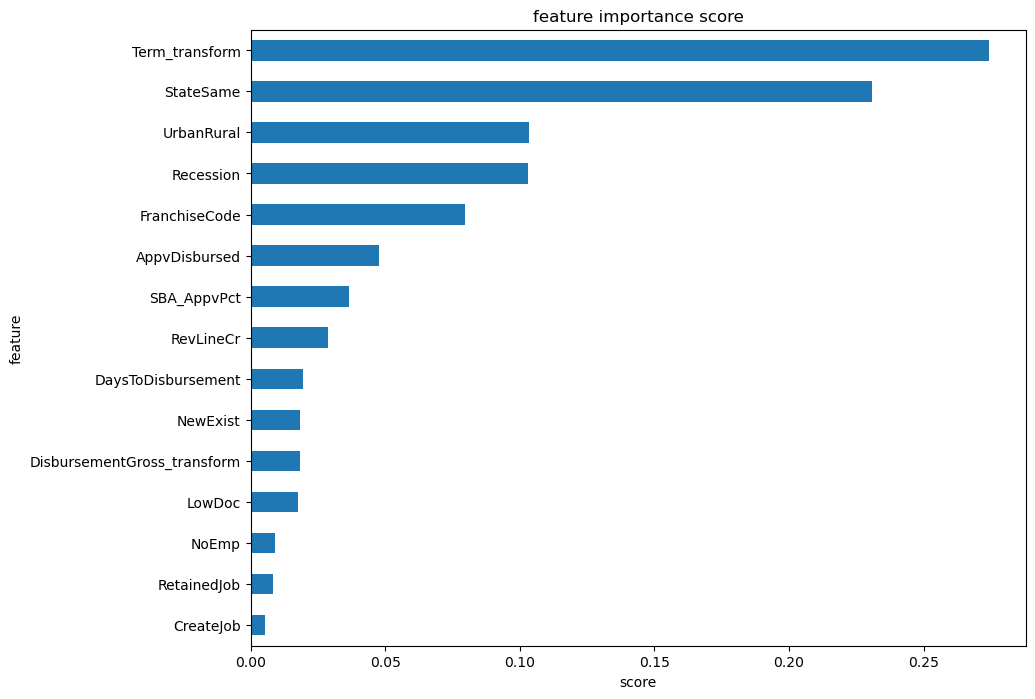

In [64]:
show_feature_importance(xg)

### Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

eval_clasification(dt)

Accuracy (Tes Set) : 0.92
Precision (Tes Set): 0.81
Recall (Test Set): 0.81
AUC (Test Proba): 0.88
AUC (train-proba) : 1.00
recall (crossval train): 0.9994798856775354
recall (crossval test): 0.7534379817169994


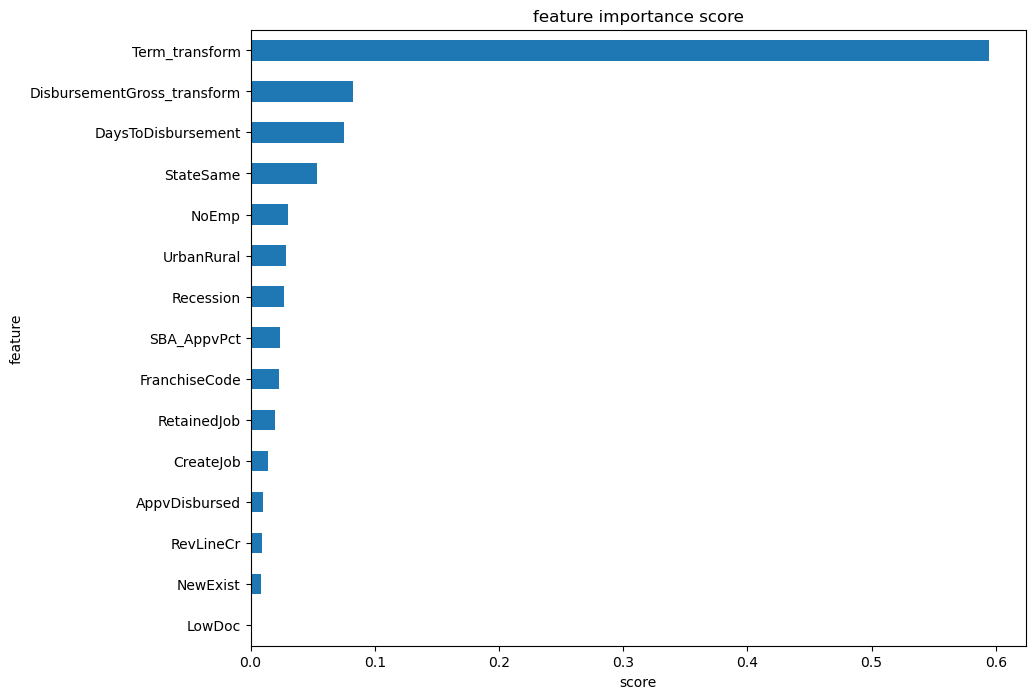

In [65]:
show_feature_importance(dt)

### Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

eval_clasification(rf)

Accuracy (Tes Set) : 0.94
Precision (Tes Set): 0.89
Recall (Test Set): 0.82
AUC (Test Proba): 0.97
AUC (train-proba) : 1.00
recall (crossval train): 0.9994903401531937
recall (crossval test): 0.745355701574226


### Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn

logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_clasification(logreg)

Accuracy (Tes Set) : 0.84
Precision (Tes Set): 0.71
Recall (Test Set): 0.47
AUC (Test Proba): 0.86
AUC (train-proba) : 0.87
recall (crossval train): 0.4638927107026718
recall (crossval test): 0.35471142795882016


### AdaBoost

In [69]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(random_state=42)
abc.fit(X_train, y_train)
eval_clasification(abc)

Accuracy (Tes Set) : 0.91
Precision (Tes Set): 0.81
Recall (Test Set): 0.77
AUC (Test Proba): 0.95
AUC (train-proba) : 0.95
recall (crossval train): 0.7677309020130977
recall (crossval test): 0.6597734731424897


### GradientBoost

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
eval_clasification(gbc)

Accuracy (Tes Set) : 0.93
Precision (Tes Set): 0.87
Recall (Test Set): 0.82
AUC (Test Proba): 0.97
AUC (train-proba) : 0.97
recall (crossval train): 0.8273062729718589
recall (crossval test): 0.7642893208060648


In [65]:
from sklearn.metrics import confusion_matrix

Ytrue = y_test
Ypred = pd.Series(xg.predict(X_test))

cm_xg = confusion_matrix(Ytrue, Ypred)
cm_xg

array([[67076,  2155],
       [ 2518, 16685]])

In [66]:
TP = cm_xg[0][0]
FN = cm_xg[1][0]
FP = cm_xg[0][1]
TN = cm_xg[1][1]

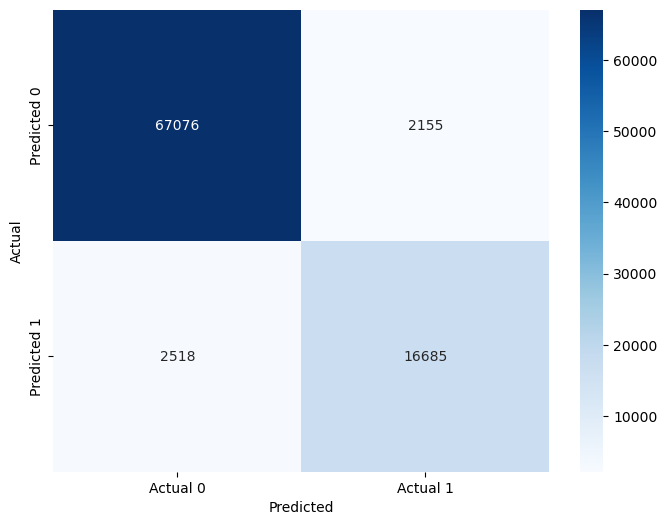

In [67]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung matriks kebingungan
cm = confusion_matrix(y_test, xg.predict(X_test))

# Plot matriks kebingungan
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Menggunakan fmt='d' untuk angka tanpa notasi ilmiah
ax.xaxis.set_ticklabels(['Actual 0', 'Actual 1'])
ax.yaxis.set_ticklabels(['Predicted 0', 'Predicted 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Result

Dapat dilihat dengan model yang telah dibuat

- **TP(67076)** = Model sukses memprediksi positif(ChgOff) yg kenyataanya benar ChgOff
- **TN(16685)** = Model sukses memprediksi negatif(ChgOff) yang kenyataannya tidak ChgOff
- **FP(2155)** = Model memprediksi positif(ChgOff) yang kenyataannya tidak ChgOff
- **FN(2518)** = Model memprediksi negatif(ChgOff) yang kenyataannya benar ChgOff

### Insight dari Feature Importances

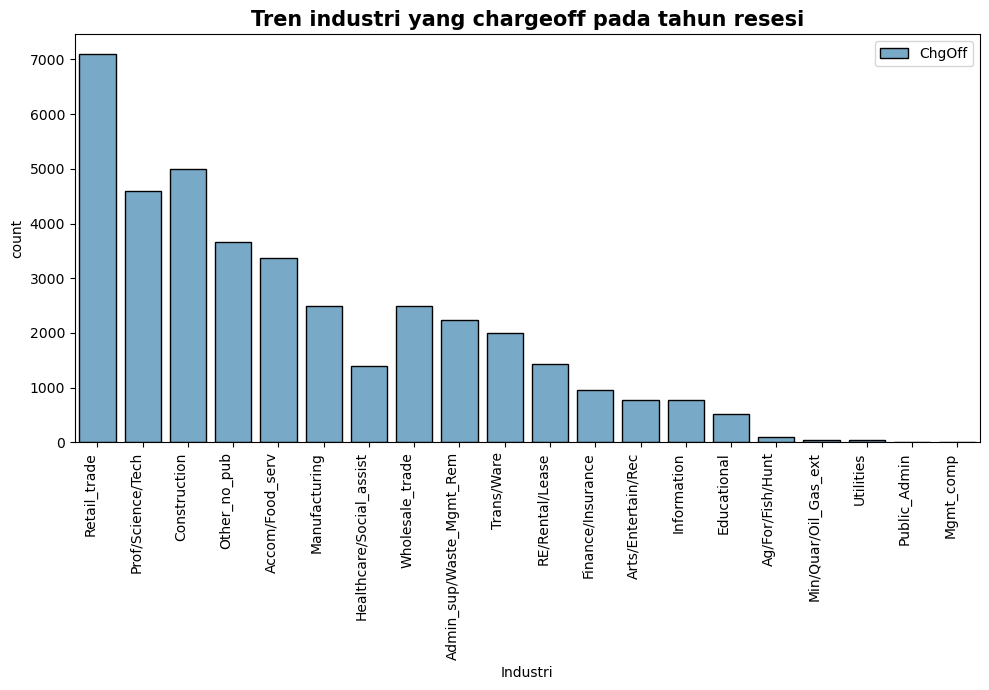

In [81]:
plt.figure(figsize=(10, 7))

industri_counts = df_prep[(df_prep['DisbursementYear'] >= 2007) & (df_prep['DisbursementYear'] <= 2009)]['Industri'].value_counts().sort_values(ascending=False)

sns.countplot(data=df_prep[(df_prep['DisbursementYear'] >= 2007) & (df_prep['DisbursementYear'] <= 2009)], 
              x='Industri', hue='MIS_Status', hue_order=[1], palette='Blues', 
              lw=1, ec='k', orient='v', order=industri_counts.index)

plt.title('Tren industri yang chargeoff pada tahun resesi', fontsize=15, fontweight='bold')
plt.xticks(rotation=90, ha='right')
plt.legend(labels=['ChgOff'])
plt.tight_layout()
plt.show()

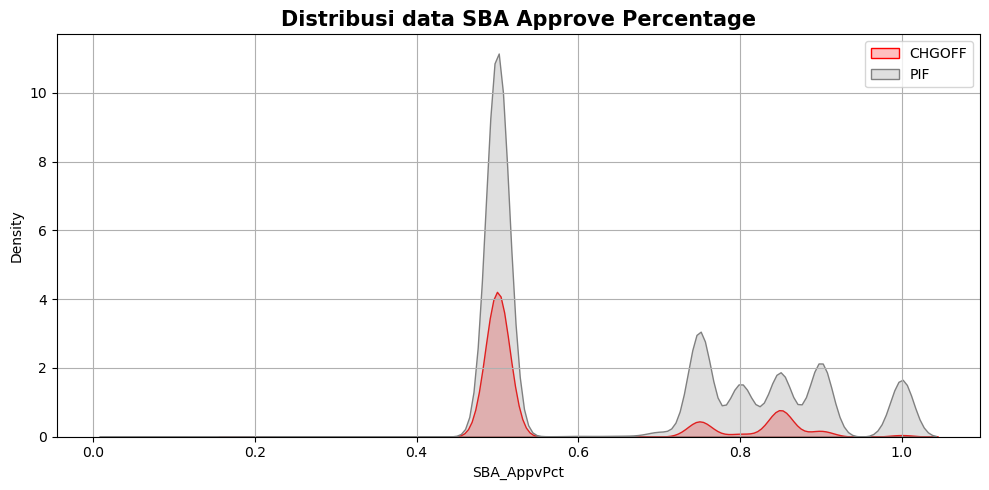

In [105]:
plt.figure(figsize=(10,5))

sns.kdeplot(data = df_prep, x='SBA_AppvPct', hue='MIS_Status', palette=['Grey', 'Red'], shade=True)

plt.title('Distribusi data SBA Approve Percentage', fontsize=15, fontweight='bold')
plt.legend(labels=['CHGOFF','PIF'])
plt.grid()
plt.tight_layout()
plt.show()

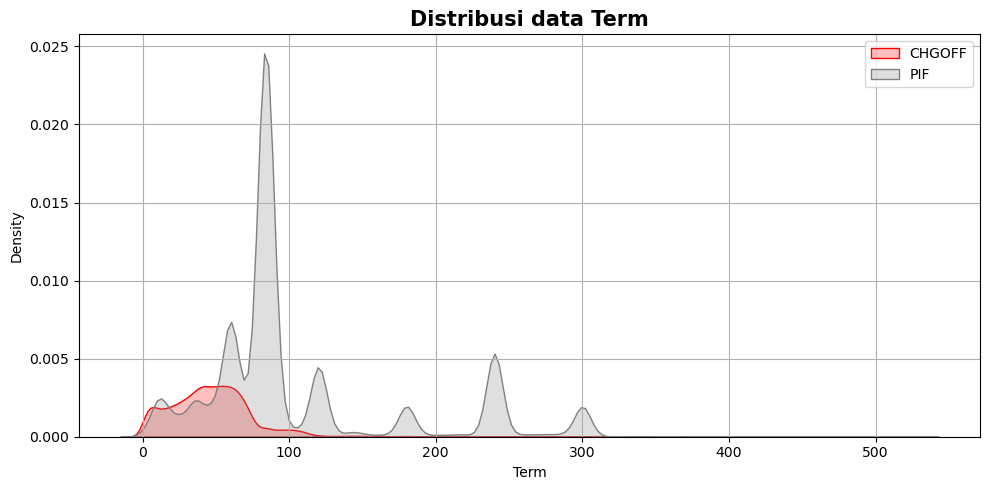

In [108]:
plt.figure(figsize=(10,5))

sns.kdeplot(data=df_prep, x='Term', hue='MIS_Status', palette=['Grey', 'Red'], shade=True)

plt.title('Distribusi data Term', fontsize=15, fontweight='bold')
plt.legend(labels=['CHGOFF','PIF'])
plt.grid()
plt.tight_layout()
plt.show()

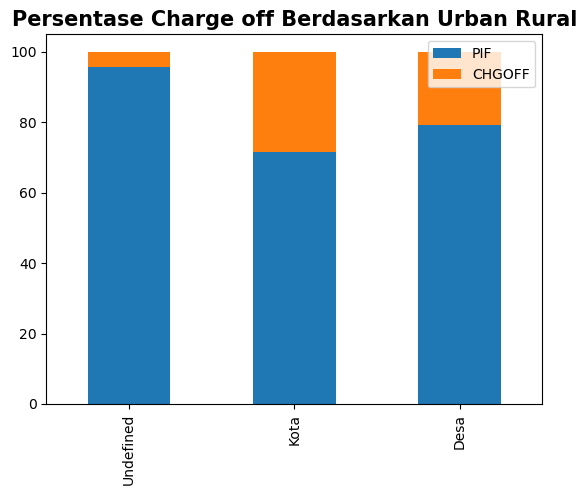

In [125]:
pct = df_prep.groupby(['UrbanRural','MIS_Status']).MIS_Status.count().reset_index(name='TotalMIS_Status')
pct['Percentage'] = 100 * pct['TotalMIS_Status']/pct.groupby('UrbanRural')['TotalMIS_Status'].transform('sum')
df_bar = pct.pivot_table(index='UrbanRural', columns='MIS_Status',
                           values='Percentage')

urban_labels = ['Undefined', 'Kota', 'Desa']
df_bar.index = np.array(urban_labels)[df_bar.index]

df_bar.plot(kind = 'bar', stacked=True)
plt.legend(labels=['PIF','CHGOFF'])
plt.title('Persentase Charge off Berdasarkan Urban Rural', fontsize=15, fontweight='bold');

<Figure size 800x500 with 0 Axes>

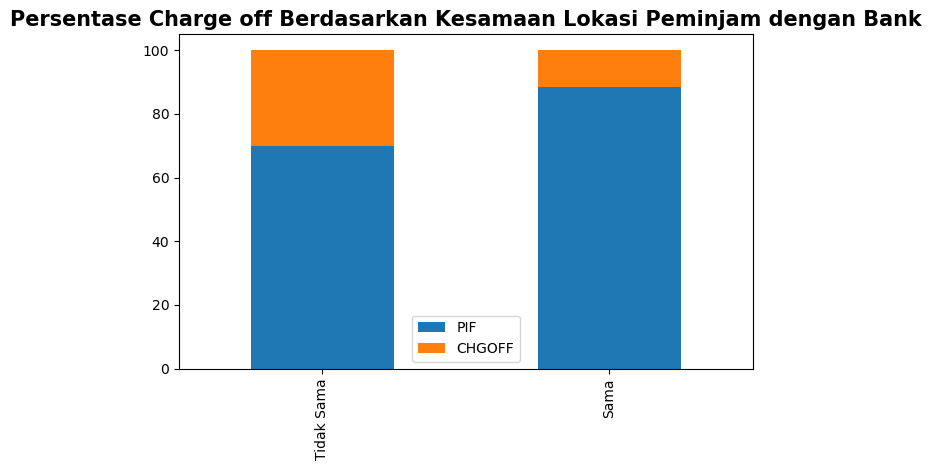

In [132]:
plt.figure(figsize=(8,5))
pct = df_prep.groupby(['StateSame','MIS_Status']).MIS_Status.count().reset_index(name='TotalMIS_Status')
pct['Percentage'] = 100 * pct['TotalMIS_Status']/pct.groupby('StateSame')['TotalMIS_Status'].transform('sum')
df_bar = pct.pivot_table(index='StateSame', columns='MIS_Status',
                           values='Percentage')

urban_labels = ['Tidak Sama', 'Sama']
df_bar.index = np.array(urban_labels)[df_bar.index]

df_bar.plot(kind = 'bar', stacked=True)
plt.legend(labels=['PIF','CHGOFF'])
plt.title('Persentase Charge off Berdasarkan Kesamaan Lokasi Peminjam dengan Bank', fontsize=15, fontweight='bold');
plt.tight_layout()